# 边缘检测实验

In [2]:
# 导入必要库
import matplotlib.pyplot as plt
import cv2
import numpy as np
%matplotlib inline

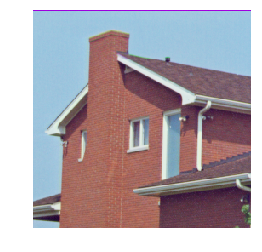

In [3]:
im = cv2.imread('.\\data\\4.1.05.tiff')
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)

plt.imshow(im)
plt.axis("off")
plt.show()

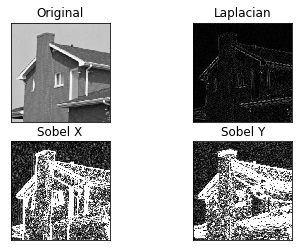

In [6]:
#拉普拉斯算子和Sobel算子边缘检测实现


img = cv2.imread('.\\data\\4.1.05.tiff',0)
laplacian = cv2.Laplacian(img,cv2.CV_64F)
laplacian = cv2.convertScaleAbs(laplacian)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobelx = cv2.convertScaleAbs(sobelx)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
sobely = cv2.convertScaleAbs(sobely)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()

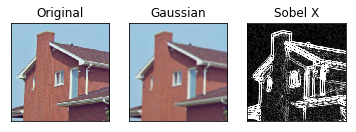

In [7]:
#LoG边缘检测实现：先高斯模糊，后拉普拉斯

kernel_size = (5, 5);
sigma = 8.5;

img = cv2.imread('.\\data\\4.1.05.tiff')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

img_Gauss = cv2.GaussianBlur(img, kernel_size, sigma);
img_LOG = cv2.Laplacian(cv2.cvtColor(img_Gauss,cv2.COLOR_BGR2GRAY),cv2.CV_16S,ksize = 5)
img_LOG = cv2.convertScaleAbs(img_LOG)

plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(img_Gauss,cmap = 'gray')
plt.title('Gaussian'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(img_LOG,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()

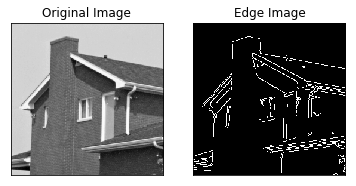

In [8]:
#Canny边缘检测实现
#First argument is our input image. 
#Second and third arguments are our minVal and maxVal respectively. 
#Third argument is aperture_size. It is the size of Sobel kernel used for find image gradients. By default it is 3. 
#Last argument is L2gradient which specifies the equation for finding gradient magnitude. 
#   
im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(im_gray,100,200,True)

plt.subplot(121),plt.imshow(im_gray,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

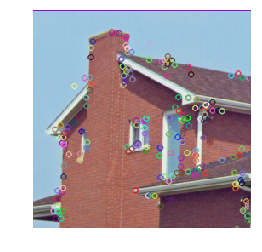

In [9]:
##sift特征点检测

im_sift = im.copy()
im_gray= cv2.cvtColor(im_sift,cv2.COLOR_RGB2GRAY)

sift = cv2.xfeatures2d.SIFT_create()
kp = sift.detect(im,None)
im_sift=cv2.drawKeypoints(im,kp,im_sift)


cv2.imwrite('sift_keypoints.jpg',im_sift)

plt.imshow(im_sift)
plt.axis("off")#去除坐标轴
plt.show()